# Deep Learning

## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: Iman Masroori
2.   Student Number: 401301102


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [18]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [19]:
dataset = pd.read_csv("./data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test

x_train = dataset['X'][0:400].to_numpy()
y_train = dataset['Y'][0:400].to_numpy()

x_test = dataset['X'][400:500].to_numpy()
y_test = dataset['Y'][400:500].to_numpy()

x_train.reshape(400,1)

y_train.reshape(400,1)

x_test.reshape(100,1)

y_test.reshape(100,1);

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [20]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A = np.ones([400,2])
A[:,0] = x_train
m = np.dot(np.linalg.inv(A.T@A),A.T@y_train)

In [21]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = np.linalg.norm(predicted_train_y - y_train)/400
test_error = np.linalg.norm(predicted_test_y - y_test)/100

print(f"MSE train error: {train_error*100}\nMSE test error: {test_error*100}")

MSE train error: 2.8490245268237966
MSE test error: 5.953949270971352


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

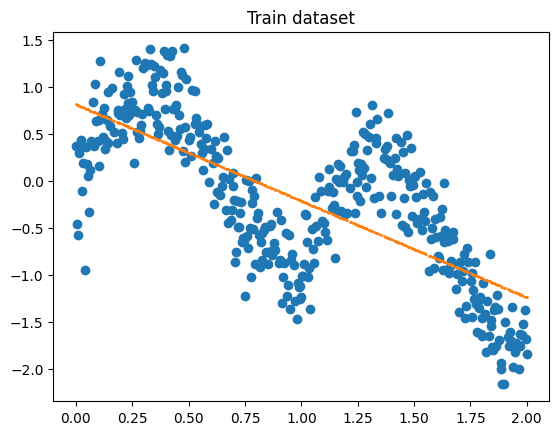

In [22]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

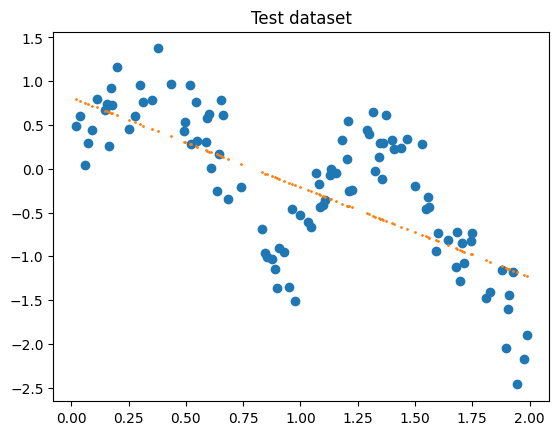

In [23]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable?

What about the line you drew in the last part?

Was it appropriate for the dataset?
<br><br/>
Explain what are the main problems here.

Considering that the training error is 6% and the training error is 3%, no is not acceptable. and this is due to the lack of data

No, not acceptable.

No, Not appropriate.

The main problem here is the simplicity of the model (linear model).

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes. The weighted linear regression model is expected to be better than the simple one. Because in the weighted model, the model has become more complicated and there is the ability to reduce the error, and according to the shape of the data, the curve fits better than the straight line.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [24]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    x= the_query_point
    l = train_dataset.shape[0] 
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp((-(xi-x)@(xi-x).T)/(2*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [25]:
def predict(train_X, train_Y, query_x, hyperparameter):
    train_X =train_X.reshape(400,1)
    l = train_X.shape[0]
    X = np.hstack((train_X, np.ones((l, 1))))
    qx = np.mat([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    train_Y = train_Y.reshape(400,1)
    theta = np.linalg.inv(X.T@W@X)@(X.T@W@train_Y)

    return np.dot(qx, theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [26]:
hyperparameter = 0.1
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
error = np.linalg.norm(y_test-predicted_test)/100
print(f"MSE test error: {error}")

MSE test error: 1.068674448305349


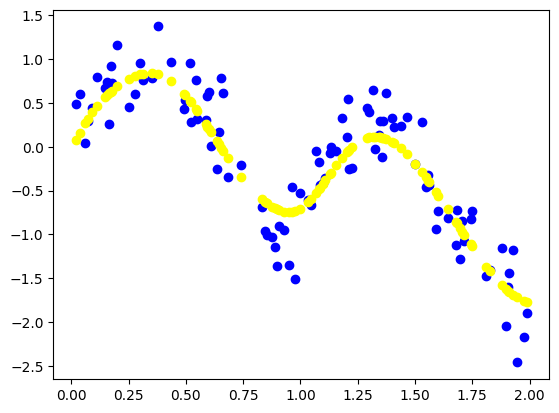

In [27]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes, because of sophisticattion in this model and number of parameter that control model, this model is better. Because of the greater degree of freedom of the weights.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

It is expected to get better, but it should be noted that K is also important and depends on K the performance.

### Part10:
Implementing the `KNN model`.

In [31]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y

    def distance(self, x1, x2):
        distance = np.linalg.norm(x1 - x2) # implement the distance function
        return distance

    def return_nn_ids(self, x):
        indices = KNN.distance(self,x,self.X).argsort()[:self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = sum([y_train[i] for i in neareest_indices])/self.k
        return predicted_y

In [32]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = np.linalg.norm(predicted_y-y_test)
    return error, predicted_y

In [35]:
k =3
error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
print(f"MSE error of KNN for test dataset: {error_knn}")

MSE error of KNN for test dataset: 8.48073859415731


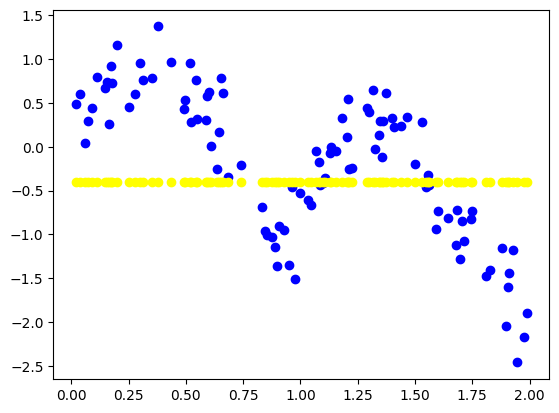

In [36]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

-write here-